# *Saad El Dine Ahmed    7370*
# Assignment 1
## Surviving a meteor strike

- Scientific prediction

![meteor](https://github.com/goodboychan/goodboychan.github.io/blob/main/_notebooks/image/meteor.png?raw=1)


## **My Modifications:**
* Data Augmentation: Added jittering, scaling, and noise to the y positions to
augment the data.
* Optimizing Network Architecture: Increased the number of neurons in each layer to 128,64,32,16 and added dropout layers to prevent overfitting.
* Applying Advanced Regularization Techniques: Added L2 regularization to the last dense layer to prevent overfitting.
* Fine-tuning Hyperparameters: Increased the number of epochs to 200 to further optimize the network architecture and fine-tune the hyperparameters.
* Implementing Effective Training Methodologies: Used early stopping to prevent overfitting and improve training efficiency.
* Utilizing Ensemble Techniques: Trained multiple models (5 in this case) and averaged their predictions to improve accuracy.
* Storing the Best Model: Kept track of the validation loss for each model and stored the model with the lowest validation loss as the best model.
* Plotting Orbits: Modified the plotting function to plot the orbits of the ensemble, the prediction of the best model, the prediction of the basic model, and the scientific data on the same plot.


## Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import regularizers
from google.colab import files
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

uploaded = files.upload()
plt.rcParams['figure.figsize'] = (8, 8)

Saving orbit.csv to orbit (1).csv


## Load Data

In [ ]:
data = pd.read_csv("orbit.csv")

# Print the data to verify it's loaded correctly
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


## Seperate data to numpy array

In [ ]:
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

In [ ]:
# Data augmentation: add jittering, scaling, and noise
jitter = np.random.normal(loc=0, scale=0.05, size=len(data))
scaled = np.random.uniform(low=0.9, high=1.1, size=len(data))
noise = np.random.normal(loc=0, scale=0.1, size=len(data))

# Apply augmentation to y_positions
y_positions_augmented = data['y'].to_numpy() * scaled + jitter + noise

# Combine original and augmented data
time_steps = np.concatenate([data['time_steps'].to_numpy(), data['time_steps'].to_numpy()])
y_positions = np.concatenate([data['y'].to_numpy(), y_positions_augmented])

# Shuffle the data
shuffle_idx = np.random.permutation(len(time_steps))
time_steps = time_steps[shuffle_idx]
y_positions = y_positions[shuffle_idx]

##Build the model (Try to change nb of units, nb of layers, adding dropout layers)

In [ ]:
# Instantiate a Sequential model
model = Sequential()
model.add(Dense(128, input_shape=(1, ), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Dense(1, kernel_regularizer=regularizers.l2(0.01)))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

##Compile the model

In [ ]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

print('Training started..., this can take a while:')

Training started..., this can take a while:


##Train and Evalute the model

In [ ]:
# Fit model on your data
model.fit(time_steps, y_positions, epochs=200, validation_split=0.2, callbacks=[early_stopping])

# Evaluate your model
print("Final loss value:", model.evaluate(time_steps, y_positions))

Epoch 1/200
100/100 [==============================] - 2s 5ms/step - loss: 1145.1671 - val_loss: 165.8829
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 211.0662 - val_loss: 122.9663
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 181.0622 - val_loss: 95.8024
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 136.6633 - val_loss: 71.1194
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 113.2574 - val_loss: 41.1761
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 89.3013 - val_loss: 24.2112
Epoch 7/200
100/100 [==============================] - 0s 3ms/step - loss: 77.7599 - val_loss: 18.7717
Epoch 8/200
100/100 [==============================] - 0s 3ms/step - loss: 67.6133 - val_loss: 19.1206
Epoch 9/200
100/100 [==============================] - 0s 3ms/step - loss: 66.0534 - val_loss: 7.6294
Epoch 10/200
100/100 [==============================] - 0s 3ms/ste

##Predict with the model

In [ ]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

# Compare With the Scientist's Orbit

3/3 [==============================] - 0s 3ms/step


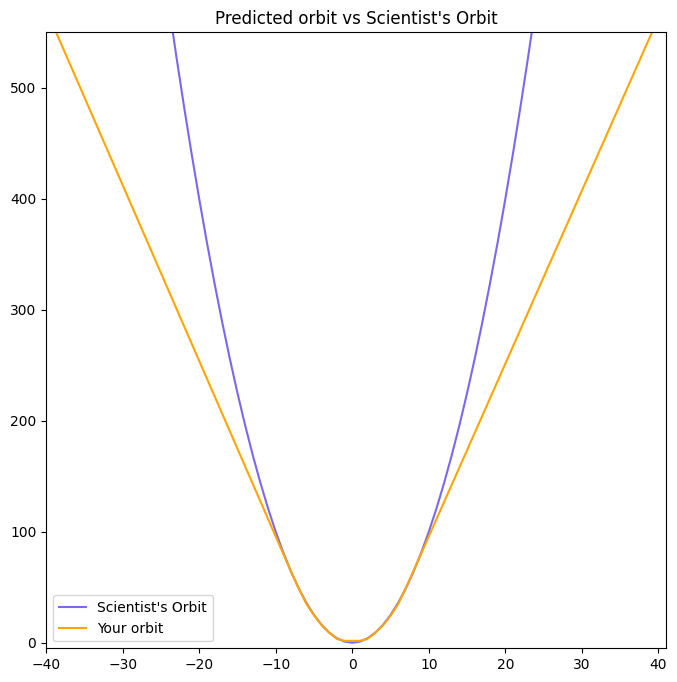

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

# It Looks Better Than the Basic model, Let's try to use an ensemble of 400 model

In [ ]:
# Utilizing Ensemble Techniques (Model Averaging)
num_models = 400
models = []
best_model = None
best_val_loss = float('inf')

for _ in range(num_models):
    model = Sequential()
    model.add(Dense(128, input_shape=(1, ), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Dense(1, kernel_regularizer=regularizers.l2(0.01)))
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(time_steps, y_positions, epochs=100, validation_split=0.2, callbacks=[early_stopping])

    # Store the best model based on validation loss
    if history.history['val_loss'][-1] < best_val_loss:
        best_model = model
        best_val_loss = history.history['val_loss'][-1]

    models.append(model)

Streaming output truncated to the last 5000 lines.
100/100 [==============================] - 0s 4ms/step - loss: 112.9818 - val_loss: 9.3135
Epoch 14/100
100/100 [==============================] - 0s 4ms/step - loss: 112.2914 - val_loss: 20.6210
Epoch 15/100
100/100 [==============================] - 0s 4ms/step - loss: 114.6317 - val_loss: 4.7091
Epoch 16/100
100/100 [==============================] - 0s 4ms/step - loss: 109.7761 - val_loss: 39.1693
Epoch 17/100
100/100 [==============================] - 0s 4ms/step - loss: 111.3892 - val_loss: 8.7469
Epoch 18/100
100/100 [==============================] - 0s 4ms/step - loss: 112.6652 - val_loss: 48.4155
Epoch 19/100
100/100 [==============================] - 0s 4ms/step - loss: 116.9940 - val_loss: 8.7228
Epoch 20/100
100/100 [==============================] - 0s 5ms/step - loss: 106.7399 - val_loss: 7.8523
Epoch 21/100
100/100 [==============================] - 0s 5ms/step - loss: 109.3293 - val_loss: 28.0797
Epoch 22/100
100/100 [

# Show All Orbits of 400 models

3/3 [==============================] - 0s 6ms/step
[<keras.src.engine.sequential.Sequential object at 0x7f666b524f70>, <keras.src.engine.sequential.Sequential object at 0x7f668016b7c0>, <keras.src.engine.sequential.Sequential object at 0x7f6681ae3670>, <keras.src.engine.sequential.Sequential object at 0x7f666be41f90>, <keras.src.engine.sequential.Sequential object at 0x7f668159bf10>, <keras.src.engine.sequential.Sequential object at 0x7f668170bf70>, <keras.src.engine.sequential.Sequential object at 0x7f666bf00070>, <keras.src.engine.sequential.Sequential object at 0x7f6681a644c0>, <keras.src.engine.sequential.Sequential object at 0x7f66710a6710>, <keras.src.engine.sequential.Sequential object at 0x7f666d2048b0>, <keras.src.engine.sequential.Sequential object at 0x7f666d3de4d0>, <keras.src.engine.sequential.Sequential object at 0x7f666b4cffa0>, <keras.src.engine.sequential.Sequential object at 0x7f666b437130>, <keras.src.engine.sequential.Sequential object at 0x7f666b466da0>, <keras.src

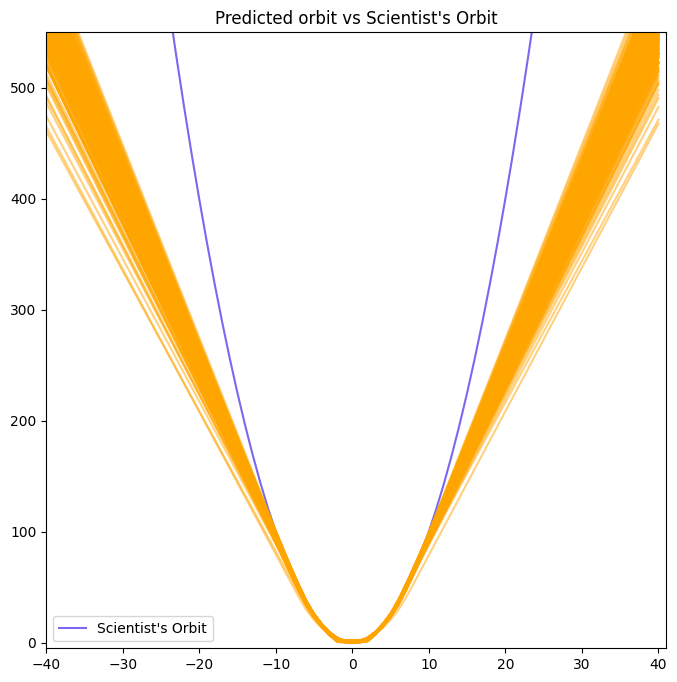

In [ ]:
def plot_orbit_ensemble(model_preds_list):
    if not model_preds_list:
        print("Empty list of model predictions.")
        return

    axeslim = int(len(model_preds_list[0]) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")

    for i, model_preds in enumerate(model_preds_list):
        plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange", alpha=0.5)

    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit"], loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

# Predict the eighty minute orbit for each model in the ensemble
ensemble_preds = [model.predict(np.arange(-40, 41)) for model in models]
print(models)

# Plot the ensemble's orbits
plot_orbit_ensemble(ensemble_preds)


# Show The Average of the ensemble Orbit

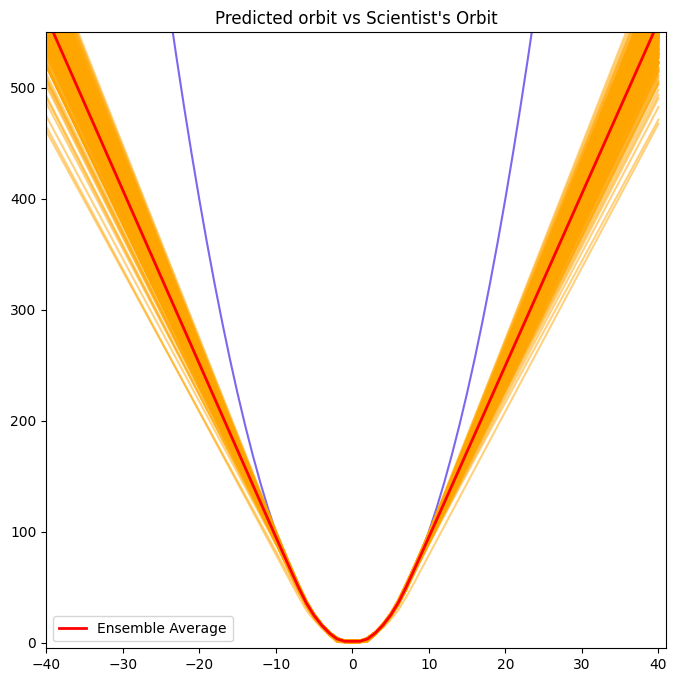

In [ ]:
# Average predictions from all models in the ensemble
ensemble_avg_pred = np.mean(ensemble_preds, axis=0)

# Plot the ensemble's orbits
plot_orbit_ensemble(ensemble_preds)

# Plot the average orbit of the ensemble
plt.plot(np.arange(-40, 41), ensemble_avg_pred, color="red", linewidth=2, label="Ensemble Average")
plt.legend()
plt.show()

# Show The Best Model Orbit

3/3 [==============================] - 0s 5ms/step


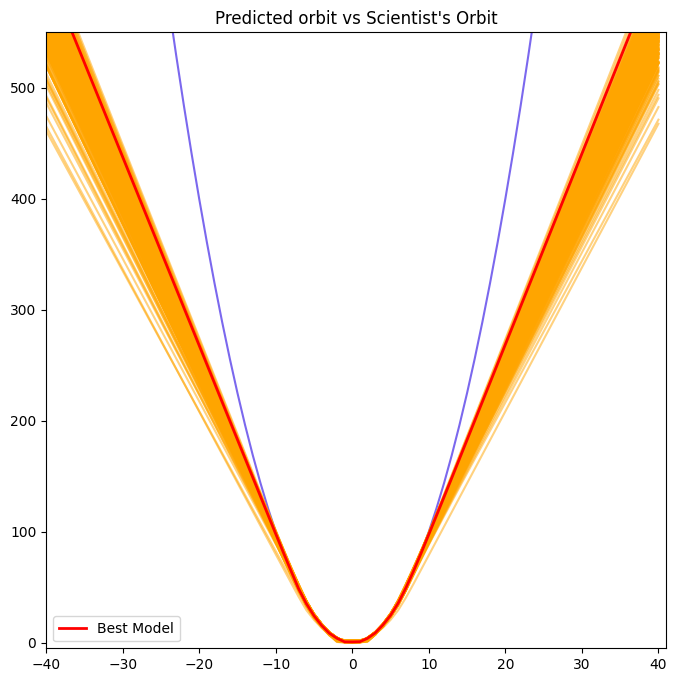

In [ ]:
# Use the best model for predictions
best_model_pred = best_model.predict(np.arange(-40, 41))

# Plot the ensemble's orbits
plot_orbit_ensemble([model.predict(np.arange(-40, 41)) for model in models])

# Plot the prediction of the best model in red
plt.plot(np.arange(-40, 41), best_model_pred, color="red", linewidth=2, label="Best Model")
plt.legend()
plt.show()

In [ ]:
# Instantiate a Sequential model
basic_model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
basic_model.add(Dense(50, input_shape=(1, ), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
basic_model.add(Dense(50, activation='relu'))
basic_model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
basic_model.add(Dense(1))

basic_model.compile(optimizer='adam', loss='mse')

basic_model.fit(time_steps, y_positions, epochs=30)

Epoch 1/30
125/125 [==============================] - 1s 2ms/step - loss: 764.4390
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 125.8166
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 82.4179
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 35.8885
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 13.7353
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 7.3842
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 5.4957
Epoch 8/30
125/125 [==============================] - 0s 2ms/step - loss: 5.1347
Epoch 9/30
125/125 [==============================] - 0s 2ms/step - loss: 4.3373
Epoch 10/30
125/125 [==============================] - 0s 2ms/step - loss: 4.2928
Epoch 11/30
125/125 [==============================] - 0s 2ms/step - loss: 4.3413
Epoch 12/30
125/125 [==============================] - 0s 2ms/step - loss: 4.4182
Epoch 13/30
125/12

# Compare Between Basic Model Orbit, Scientist's Orbit And My Best Model Orbit

3/3 [==============================] - 0s 4ms/step


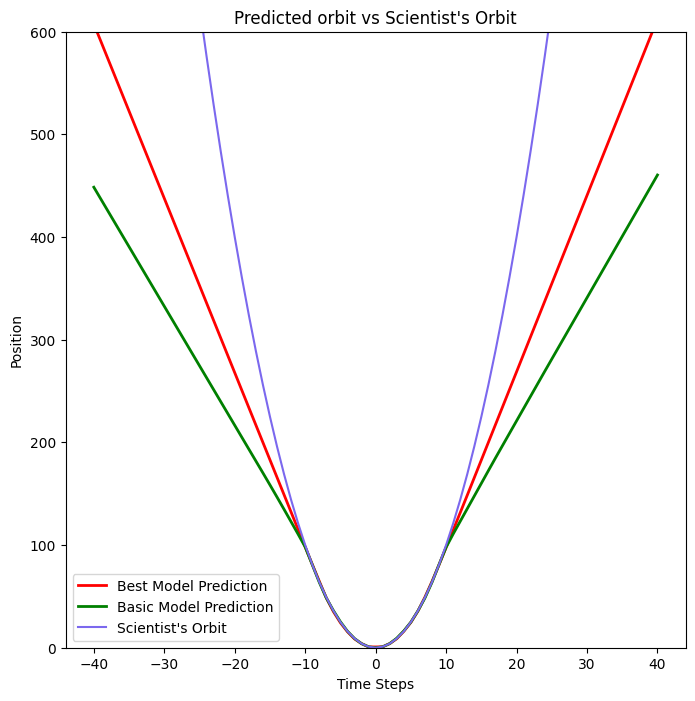

In [ ]:
# Plot the best model's orbit
plt.plot(np.arange(-40, 41), best_model_pred, color="red", linewidth=2, label="Best Model Prediction")

# Plot the basic model's orbit (assuming basic_model is defined elsewhere)
plt.plot(np.arange(-40, 41), basic_model.predict(np.arange(-40, 41)), color="green", linewidth=2, label="Basic Model Prediction")

# Plot the scientific data
plt.plot(np.arange(-40, 41), np.arange(-40, 41) ** 2, color="mediumslateblue", label="Scientist's Orbit")

plt.ylim(0, 600)  # Limit y-axis to -5 to 600
plt.legend()
plt.title("Predicted orbit vs Scientist's Orbit")
plt.xlabel("Time Steps")
plt.ylabel("Position")
plt.show()